In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.impute import SimpleImputer

In [39]:
# Getting dataset
dataset = pd.read_csv('Assignment.csv')
dataset.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,Datetime,Refrigeration Unit - 1,NaN,Refrigeration Unit - 2,NaN,Refrigeration Unit - 3,NaN,Refrigeration Unit - 4,NaN
1,NaN,NaN,Power,Temperature,Power,Temperature,Power,Temperature,Power,Temperature
2,NaN,8/1/17 0:00,2.26,4.81,3.23,0.50,0.00,8.93,0.31,3.34
3,NaN,8/1/17 0:01,2.20,3.90,3.19,0.25,0.00,8.90,1.34,3.44
4,NaN,8/1/17 0:02,2.13,3.16,3.18,0.00,0.00,8.87,2.37,2.72


In [40]:
#Removing *not* data
X = dataset.iloc[2:, 1:]
df_X = pd.DataFrame(X)
df_X.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
2,8/1/17 0:00,2.26,4.81,3.23,0.50,0.00,8.93,0.31,3.34
3,8/1/17 0:01,2.20,3.90,3.19,0.25,0.00,8.90,1.34,3.44
4,8/1/17 0:02,2.13,3.16,3.18,0.00,0.00,8.87,2.37,2.72
5,8/1/17 0:03,2.14,2.72,3.17,-0.22,0.00,8.81,2.23,2.13
6,8/1/17 0:04,1.23,2.31,3.17,-0.50,0.00,8.81,2.23,1.75


In [41]:
#Counting missing values of power
missing_pu=['Unnamed: 2', 'Unnamed: 4', 'Unnamed: 6', 'Unnamed: 8']
missing_punitwise=[]

for i in range(4):
  req_pu=missing_pu[i]
  mpu = df_X[req_pu].isnull().sum()
  print("Total number of missing values of Power values for Unit-", i, "is", mpu)
  missing_punitwise.append(mpu)

Total number of missing values of Power values for Unit- 0 is 77
Total number of missing values of Power values for Unit- 1 is 494
Total number of missing values of Power values for Unit- 2 is 233
Total number of missing values of Power values for Unit- 3 is 1242


In [42]:
#Counting missing values of Temperature
missing_tu=['Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9']
missing_tunitwise=[]

for i in range(4):
  req_tu=missing_tu[i]
  mtu = df_X[req_tu].isnull().sum()
  print("Total number of missing values of Temperature values for Unit-", i, "is", mtu)
  missing_tunitwise.append(mtu)

Total number of missing values of Temperature values for Unit- 0 is 0
Total number of missing values of Temperature values for Unit- 1 is 387
Total number of missing values of Temperature values for Unit- 2 is 0
Total number of missing values of Temperature values for Unit- 3 is 70


In [0]:
#Taking care of missing data
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X.iloc[:, 1:])
X.iloc[:, 1:] = imputer.transform(X.iloc[:, 1:])

In [44]:
#Renaming row and restarting column from index 0
df_X = df_X.rename(columns = {'Unnamed: 1': 'DateTime', 'Unnamed: 2': 'Power U-1', 'Unnamed: 3': 'Temperature U-1', 'Unnamed: 4': 'Power U-2', 'Unnamed: 5': 'Temperature U-2', 'Unnamed: 6': 'Power U-3', 'Unnamed: 7': 'Temperature U-3', 'Unnamed: 8': 'Power U-4', 'Unnamed: 9': 'Temperature U-4'})
l = []
for i in range(len(df_X)):
  l.append(i)

df_X.index = l

df_X.head()

,DateTime,Power U-1,Temperature U-1,Power U-2,Temperature U-2,Power U-3,Temperature U-3,Power U-4,Temperature U-4
0,8/1/17 0:00,2.26,4.81,3.23,0.5,0,8.93,0.31,3.34
1,8/1/17 0:01,2.2,3.9,3.19,0.25,0,8.9,1.34,3.44
2,8/1/17 0:02,2.13,3.16,3.18,0,0,8.87,2.37,2.72
3,8/1/17 0:03,2.14,2.72,3.17,-0.22,0,8.81,2.23,2.13
4,8/1/17 0:04,1.23,2.31,3.17,-0.5,0,8.81,2.23,1.75


In [45]:
#Checking values in between
df_check = df_X[(df_X['DateTime'] > '8/1/17 2:28') & (df_X['DateTime'] <= '8/1/17 3:58')]

df_check.head(90)

,DateTime,Power U-1,Temperature U-1,Power U-2,Temperature U-2,Power U-3,Temperature U-3,Power U-4,Temperature U-4
149,8/1/17 2:29,2.37,4.75,3.15,-3.4,2.06,1.94,2.23,2.9469
150,8/1/17 2:30,2.24,3.81,3.15,-3.53,2.07,1.75,1.37253,1.68
151,8/1/17 2:31,2.2,3.03,1.77,-3.65,1.18,1.62,1.37253,1.38
152,8/1/17 2:32,2.22,2.53,0.4,-2.75,0.28,2.03,1.37253,0.94
153,8/1/17 2:33,0.31,2.28,0.39,-1.53,0.28,2.87,1.37253,0.56
...,...,...,...,...,...,...,...,...,...
234,8/1/17 3:54,0.31,4.28,0.39,5.75,2.03,2.25,1.37253,1.56
235,8/1/17 3:55,0.31,4.59,0.39,6.12,2.06,2,2.28,1.37
236,8/1/17 3:56,0.31,4.78,0.39,6.78,0.28,1.81,2.27,1.12
237,8/1/17 3:57,1.37,4.9,0.39,6.91,0.28,2.28,2.29,0.84


In [46]:
# Part-1: Calculating Duty cycle of each Refrigeration Unit
d1=0
d2=0
d3=0
d4=0
for i in range(len(df_X)):
  if df_X['Power U-1'][i]==0:
    d1=d1+1
  if df_X['Power U-2'][i]==0:
    d2=d2+1
  if df_X['Power U-3'][i]==0:
    d3=d3+1
  if df_X['Power U-4'][i]==0:
    d4=d4+1

d1_max=d1+missing_pu1
d2_max=d2+missing_pu2
d3_max=d3+missing_pu3
d4_max=d4+missing_pu4

print(round(100-d1_max/144, 4), "% <= Duty cycle of Refrigeration Unit-1 <=", round(100-d1/144, 4), "%")
print(round(100-d2_max/144, 4), "% <= Duty cycle of Refrigeration Unit-2 <=", round(100-d2/144, 4), "%")
print(round(100-d3_max/144, 4), "% <= Duty cycle of Refrigeration Unit-3 <=", round(100-d3/144, 4), "%")
print(round(100-d4_max/144, 4), "% <= Duty cycle of Refrigeration Unit-4 <=", round(100-d4/144, 4), "%")


97.1736 % <= Duty cycle of Refrigeration Unit-1 <= 97.7083 %
94.5139 % <= Duty cycle of Refrigeration Unit-2 <= 97.9444 %
90.1875 % <= Duty cycle of Refrigeration Unit-3 <= 91.8056 %
91.1181 % <= Duty cycle of Refrigeration Unit-4 <= 99.7431 %


In [47]:
df_X.head()

,DateTime,Power U-1,Temperature U-1,Power U-2,Temperature U-2,Power U-3,Temperature U-3,Power U-4,Temperature U-4
0,8/1/17 0:00,2.26,4.81,3.23,0.5,0,8.93,0.31,3.34
1,8/1/17 0:01,2.2,3.9,3.19,0.25,0,8.9,1.34,3.44
2,8/1/17 0:02,2.13,3.16,3.18,0,0,8.87,2.37,2.72
3,8/1/17 0:03,2.14,2.72,3.17,-0.22,0,8.81,2.23,2.13
4,8/1/17 0:04,1.23,2.31,3.17,-0.5,0,8.81,2.23,1.75


In [48]:
#Part 2: Finding temperature range
li_min=[]
li_max=[]
pl_t = ['Temperature U-1', 'Temperature U-2', 'Temperature U-3', 'Temperature U-4']

for t in range(4):
  req=pl_t[t]
  minval=min(df_X[req])
  maxval=max(df_X[req])
  li_min.append(minval)
  li_max.append(maxval)
  print("#Unit -", t+1)
  print("Minimum value of temperature ", "of Unit-", t+1, "=", minval)
  print("Maximum value of temperature ", "of Unit-", t+1, "=", maxval)
  print("Temperature range", "of Unit-", t+1, "=", round(maxval-minval, 3))
  print()

#Unit - 1
Minimum value of temperature  of Unit- 1 = 1.65
Maximum value of temperature  of Unit- 1 = 102.38
Temperature range of Unit- 1 = 100.73

#Unit - 2
Minimum value of temperature  of Unit- 2 = -4.09
Maximum value of temperature  of Unit- 2 = 102.63
Temperature range of Unit- 2 = 106.72

#Unit - 3
Minimum value of temperature  of Unit- 3 = 1.09
Maximum value of temperature  of Unit- 3 = 101.91
Temperature range of Unit- 3 = 100.82

#Unit - 4
Minimum value of temperature  of Unit- 4 = 0.19
Maximum value of temperature  of Unit- 4 = 101.66
Temperature range of Unit- 4 = 101.47



In [49]:
#Calculating average temperature value
avg_temperature_cons=[]
temp_comp=[]
avgtemp=[]

for t in range(4):
  li_t=[]
  c=0
  req_t = pl_t[t]
  for k in range(10):
    temp_t=0
    j=k*1440
    for i in range(j, j+1440):
      temp_t=temp_t+df_X[req_t][i]
    
    temp_t=temp_t/1440
    temp_t=round(temp_t, 3)
    if 1<=temp_t<=4:
      c=c+1
    li_t.append(temp_t)
  temp_comp.append(c)

  avg_temperature_cons.append(li_t)
  print("For Refrigeration Unit: ", t+1)
  for i in range(10):
    print("Average temperature on Day-", i+1,  "of Unit-", t+1, "=", li_t[i])
  
  print()
  

For Refrigeration Unit:  1
Average temperature on Day- 1 of Unit- 1 = 3.682
Average temperature on Day- 2 of Unit- 1 = 4.006
Average temperature on Day- 3 of Unit- 1 = 3.704
Average temperature on Day- 4 of Unit- 1 = 3.746
Average temperature on Day- 5 of Unit- 1 = 3.678
Average temperature on Day- 6 of Unit- 1 = 3.926
Average temperature on Day- 7 of Unit- 1 = 3.882
Average temperature on Day- 8 of Unit- 1 = 3.793
Average temperature on Day- 9 of Unit- 1 = 3.968
Average temperature on Day- 10 of Unit- 1 = 3.796

For Refrigeration Unit:  2
Average temperature on Day- 1 of Unit- 2 = 1.969
Average temperature on Day- 2 of Unit- 2 = 1.884
Average temperature on Day- 3 of Unit- 2 = 2.503
Average temperature on Day- 4 of Unit- 2 = 1.849
Average temperature on Day- 5 of Unit- 2 = 2.225
Average temperature on Day- 6 of Unit- 2 = 1.971
Average temperature on Day- 7 of Unit- 2 = 2.066
Average temperature on Day- 8 of Unit- 2 = 2.138
Average temperature on Day- 9 of Unit- 2 = 1.991
Average tempe

In [59]:
for i in range(4):
  val = sum(avg_temperature_cons[i])/10
  val=round(val, 3)
  avgtemp.append(val)
  print("Average temperature of Unit-", i+1, "=", val)

Average temperature of Unit- 1 = 3.818
Average temperature of Unit- 2 = 2.09
Average temperature of Unit- 3 = 4.121
Average temperature of Unit- 4 = 2.947


In [60]:
print(avgtemp)

[3.818, 2.09, 4.121, 2.947]


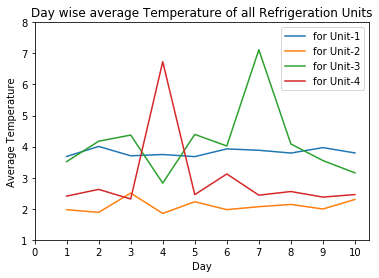

In [61]:
#Ploting average daily temperature
l_day=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(l_day, avg_temperature_cons[0], label='for Unit-1')
plt.plot(l_day, avg_temperature_cons[1], label='for Unit-2')
plt.plot(l_day, avg_temperature_cons[2], label='for Unit-3')
plt.plot(l_day, avg_temperature_cons[3], label='for Unit-4')
plt.xlabel("Day")
plt.ylabel("Average Temperature")
plt.title('Day wise average Temperature of all Refrigeration Units')
plt.xticks(np.arange(0, 11, 1)) 
plt.yticks(np.arange(1, 9, 1)) 
plt.legend()

In [62]:
#Part 3: Calculating average daily energy consumption
pl = ['Power U-1', 'Power U-2', 'Power U-3', 'Power U-4']
avg_energy_cons=[]
avgpow=[]

for t in range(4):
  li=[]
  req = pl[t]
  for k in range(10):
    temp=0
    j=k*1440
    for i in range(j, j+1440):
      temp=temp+df_X[req][i]
    
    temp=temp/1440
    temp=round(temp, 3)
    li.append(temp)

  avg_energy_cons.append(li)
  print("For Unit:", t+1)
  for i in range(10):
    print("Average energy consumption on Day-", i+1, "=", li[i])
  print()

For Unit: 1
Average energy consumption on Day- 1 = 1.195
Average energy consumption on Day- 2 = 1.142
Average energy consumption on Day- 3 = 1.085
Average energy consumption on Day- 4 = 1.167
Average energy consumption on Day- 5 = 1.127
Average energy consumption on Day- 6 = 1.24
Average energy consumption on Day- 7 = 1.085
Average energy consumption on Day- 8 = 1.062
Average energy consumption on Day- 9 = 1.05
Average energy consumption on Day- 10 = 1.084

For Unit: 2
Average energy consumption on Day- 1 = 1.669
Average energy consumption on Day- 2 = 1.608
Average energy consumption on Day- 3 = 1.664
Average energy consumption on Day- 4 = 1.747
Average energy consumption on Day- 5 = 1.883
Average energy consumption on Day- 6 = 1.776
Average energy consumption on Day- 7 = 1.624
Average energy consumption on Day- 8 = 1.739
Average energy consumption on Day- 9 = 1.633
Average energy consumption on Day- 10 = 1.743

For Unit: 3
Average energy consumption on Day- 1 = 1.513
Average energy co

In [63]:
for i in range(4):
  val = sum(avg_energy_cons[i])/10
  val=round(val, 3)
  avgpow.append(val)
  print("Average energy consumption of Unit-", i+1, "=", val)

Average energy consumption of Unit- 1 = 1.124
Average energy consumption of Unit- 2 = 1.709
Average energy consumption of Unit- 3 = 1.604
Average energy consumption of Unit- 4 = 1.373


In [64]:
print(avgpow)

[1.124, 1.709, 1.604, 1.373]


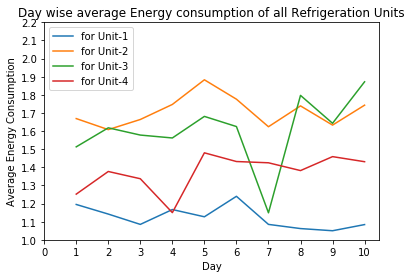

In [65]:
#Ploting daily energy consumption
plt.plot(l_day, avg_energy_cons[0], label='for Unit-1')
plt.plot(l_day, avg_energy_cons[1], label='for Unit-2')
plt.plot(l_day, avg_energy_cons[2], label='for Unit-3')
plt.plot(l_day, avg_energy_cons[3], label='for Unit-4')

plt.xlabel("Day")
plt.ylabel("Average Energy Consumption")
plt.title('Day wise average Energy consumption of all Refrigeration Units')
plt.xticks(np.arange(0, 11, 1)) 
plt.yticks(np.arange(1, 2.2, 0.1)) 
plt.legend()

In [66]:
#Part:4 Percentage of temperature compilance
tl = ['Temperature U-1', 'Temperature U-2', 'Temperature U-3', 'Temperature U-4']

for t in range(4):
  li_T=[]
  req=tl[t]
  c=0
  for k in range(14400):
    if (1<=df_X[req][k]<=4):
      c=c+1

  li_T.append(c)
  print("Percentage of temperature compliance", "by Refrigeration Unit-", t+1, "=", round(c/144, 3), "%")


Percentage of temperature compliance by Refrigeration Unit- 1 = 55.792 %
Percentage of temperature compliance by Refrigeration Unit- 2 = 33.688 %
Percentage of temperature compliance by Refrigeration Unit- 3 = 73.125 %
Percentage of temperature compliance by Refrigeration Unit- 4 = 86.792 %


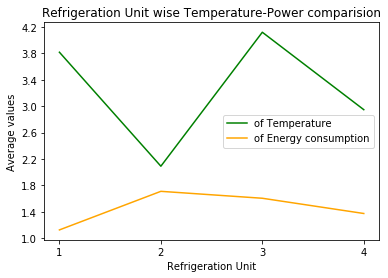

In [67]:
unit_val=[1, 2, 3, 4]
plt.plot(unit_val, avgtemp, color='g', label='of Temperature')
plt.plot(unit_val, avgpow, color='orange', label='of Energy consumption')
plt.xlabel('Refrigeration Unit')
plt.ylabel('Average values')
plt.title('Refrigeration Unit wise Temperature-Power comparision')
plt.xticks(np.arange(1, 5, 1)) 
plt.yticks(np.arange(1, 4.4, 0.4)) 
plt.legend()